In [1]:
import qiskit
qiskit.__version__

'0.16.1'

In [4]:
# Enable your account on Qiskit, replace 'My_API_Token' with your newly generated token
qiskit.IBMQ.save_account('6d1fc9bd0100fbcd25f55a0c3cb2872ddfdc6c0eb01394491ea8c5eb9e3fd6d89e8d509d9f45e82b3840c41a8581733a30f3c91bddf0aeed4534edab65f07e0e',overwrite=True)
my_provider=qiskit.IBMQ.load_account()
# After loading credentials we query the backends
print(my_provider.backends())

ibmqfactory.load_account:WARNING:2021-05-11 14:07:19,789: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [8]:
from qiskit.tools.jupyter import *

In [9]:
# Show Quantum Device Overiew
%qiskit_backend_overview

In [12]:
# Show individual backend details
my_provider = qiskit.IBMQ.get_provider()
backend  = my_provider.get_backend('ibmqx2')
%qiskit_backend_monitor backend

UsageError: Line magic function `%qiskit_backend_monitor` not found.


In [18]:
# Use BasicAer's qasm_simulator
backend_sim = qiskit.BasicAer.get_backend('qasm_simulator')

In [6]:
# Define the Quantum and Classical Registers
q = qiskit.QuantumRegister(1)
c = qiskit.ClassicalRegister(1)

# Build the circuit
single_q_measurement = qiskit.QuantumCircuit(q, c)
single_q_measurement.measure(q, c);

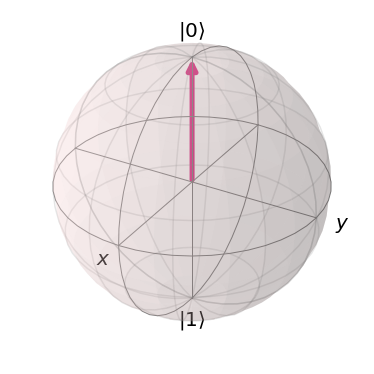

In [13]:
qiskit.tools.visualization.plot_bloch_vector([0, 0, 1])

In [14]:
# Execute the circuit
job = qiskit.execute(single_q_measurement, backend_sim)
result = job.result()
# Print the result
counts = result.get_counts(single_q_measurement)
print(counts)

{'0': 1024}


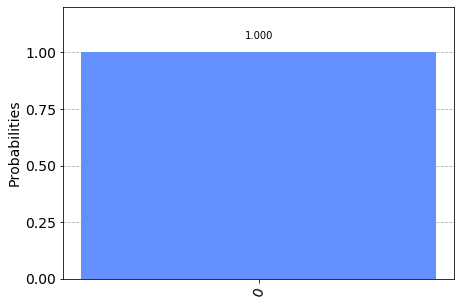

In [15]:
qiskit.tools.visualization.plot_histogram(counts)

# Quantum NOT Gate

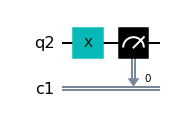

In [16]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an X gate on the qubit wire. The registers are zero-indexed.
circ.x(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')

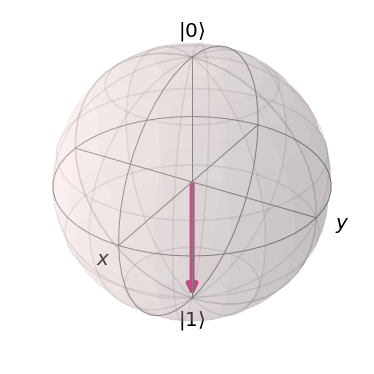

In [17]:
qiskit.tools.visualization.plot_bloch_vector([0, 0, -1])

In [19]:
# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'1': 100}


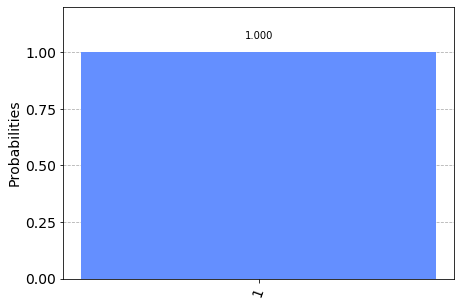

In [20]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

# Superposition

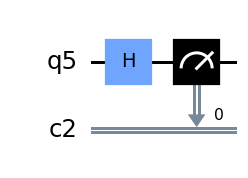

In [21]:
# Create a Quantum Register with 1 qubit (wire).
qr = qiskit.QuantumRegister(1)

# Create a Classical Register with 1 bit (double wire).
cr = qiskit.ClassicalRegister(1)

# Create a Quantum Circuit from the quantum and classical registers
circ = qiskit.QuantumCircuit(qr, cr)

# Place an Hadamard gate on the qubit wire
circ.h(qr[0])

# Measure the qubit into the classical register
circ.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl', scale=1.5)

In [22]:
# Execute the circuit on the qasm simulator, running it 100 times.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()

# Print the counts, which are contained in a Python dictionary
counts = result_sim.get_counts(circ)
print(counts)

{'0': 54, '1': 46}


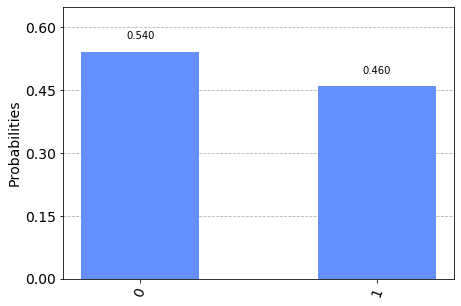

In [23]:
# Plot the results on a bar chart
qiskit.tools.visualization.plot_histogram(counts)

# Applying Hadamard Twice

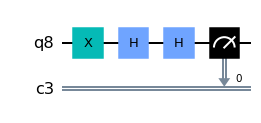

In [24]:
# Build a circuit with 1 qubit and 1 classical bit
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
qc = qiskit.QuantumCircuit(qr, cr)
# Apply 2 Hadamard gates on the circuit and then measure
qc.x(qr[0])
qc.h(qr[0])
qc.h(qr[0])
qc.measure(qr, cr)
# Draw the circuit
qc.draw(output='mpl')

In [25]:
# Run the circuit and print the output counts
result = qiskit.execute(qc, backend_sim, shots=100).result()
counts = result.get_counts()
print(counts)

{'1': 100}


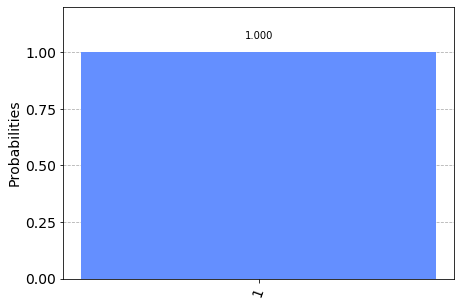

In [26]:
# Print the histogram
qiskit.tools.visualization.plot_histogram(counts)

# Other Quantum Gates

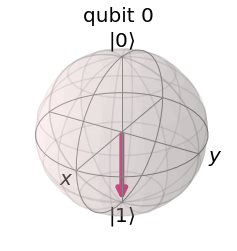

In [27]:
# Get the statevector simulator to inspect the quantum state
backend_sv_sim = qiskit.BasicAer.get_backend('statevector_simulator')
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.y(qr)
result = qiskit.execute(circ, backend_sv_sim).result()
qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

The above shows the end state after applying the Pauli Y gate (which like the Pauli X/Quantum Not gate) can be thought of a 180 degree rotation around the Y axis. So when starting from the | 0⟩  basis state the result is the | 1⟩  basis state.

However, many gates rotate the phase. To visualize any change in phase you'll want to put the qubit in superposition with a hadamard gate first. For example

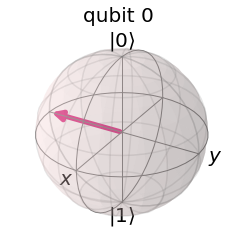

In [31]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.h(qr)
circ.sdg(qr)
result = qiskit.execute(circ, backend_sv_sim).result()

qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

This example shows the output of the  𝑆†  (or, conjugate of  √Z phase) gate on the bloch sphere for a qubit in superposition from a Hadamard gate. Since it is a phase gate it has no noticeable effect on a qubit in the | 0⟩  basis state:

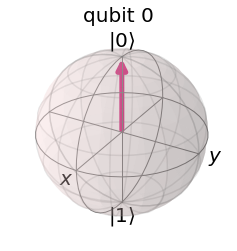

In [30]:
qr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
circ = qiskit.QuantumCircuit(qr, cr)
circ.sdg(qr)
result = qiskit.execute(circ, backend_sv_sim).result()

qiskit.tools.visualization.plot_bloch_multivector(result.get_statevector())

# MultiQubit Circuit and Gates

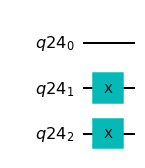

In [32]:
# Create a Quantum Register with 3 qubits
qr = qiskit.QuantumRegister(3)

# Create a Quantum Circuit from the quantum register. Because we're going to use
# the statevector_simulator, we won't measure the circuit or need classical registers.
circ = qiskit.QuantumCircuit(qr)

# Place an X gate on the 2nd and 3rd wires. The topmost wire is index 0.
circ.x(qr[1])
circ.x(qr[2])

# Draw the circuit
circ.draw(output='mpl')

In [33]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


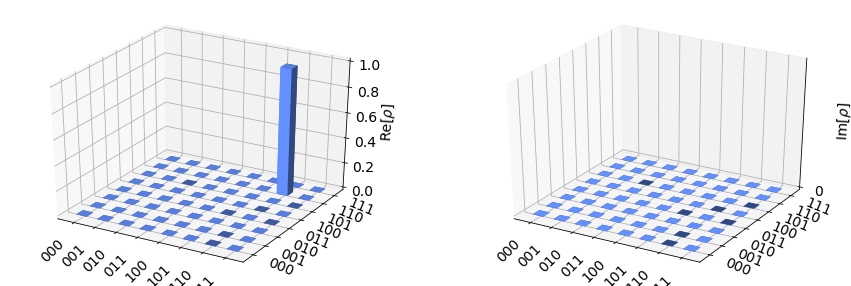

In [34]:
qiskit.tools.visualization.plot_state_city(quantum_state)

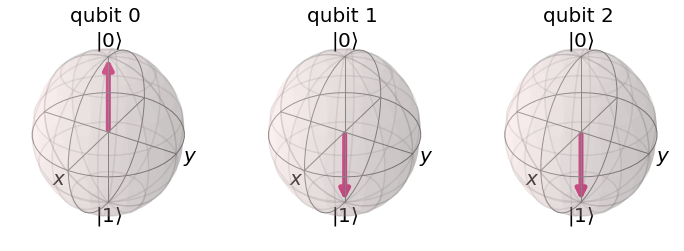

In [35]:
qiskit.tools.visualization.plot_bloch_multivector(quantum_state)

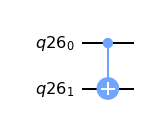

In [36]:
# Create a Quantum Register with 3 qubits
qr = qiskit.QuantumRegister(2)
cr = qiskit.ClassicalRegister(2)
circ = qiskit.QuantumCircuit(qr)
# Apply a CNOT gate with qr[0] as the control and qr[1] as the target
circ.cx(qr[0], qr[1])

meas = qiskit.QuantumCircuit(qr, cr)
meas.measure(qr, cr)

# Draw the circuit
circ.draw(output='mpl')

In [37]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


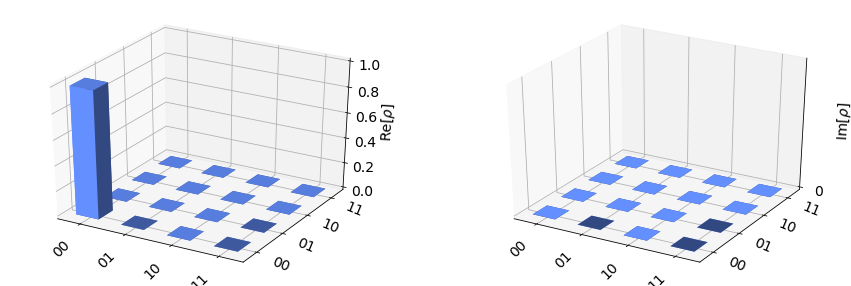

In [38]:
qiskit.tools.visualization.plot_state_city(quantum_state)

In [39]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ + meas, backend_sim)

# Grab the results from the job.
result = job_sim.result()

counts = result.get_counts()
# Output the quantum state vector
print(counts)

{'00': 1024}


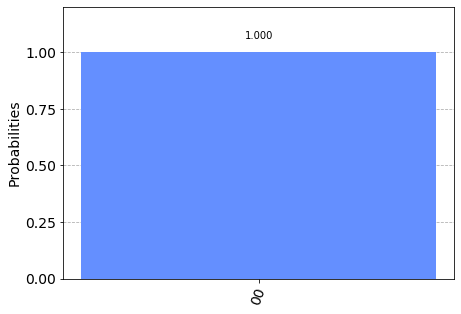

In [40]:
qiskit.tools.visualization.plot_histogram(counts)

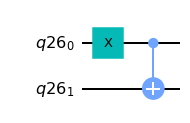

In [41]:
circ = qiskit.QuantumCircuit(qr)
# Apply an X gate on qr[0] before the CNOT
circ.x(qr[0])

# Apply a CNOT gate with qr[0] as the control and qr[1] as the target
circ.cx(qr[0], qr[1])

# Draw the circuit
circ.draw(output='mpl')

In [42]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ, backend_sv_sim)

# Grab the results from the job.
result_sim = job_sim.result()

# Obtain the state vector for the quantum circuit
quantum_state = result_sim.get_statevector(circ, decimals=3)

# Output the quantum state vector
print(quantum_state)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


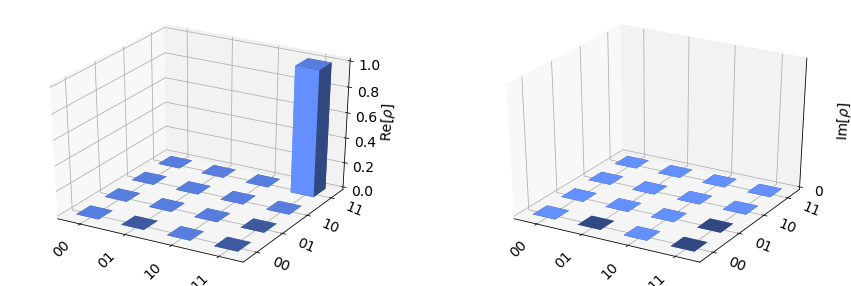

In [43]:
qiskit.tools.visualization.plot_state_city(quantum_state)

In [44]:
# Execute the circuit on the state vector simulator
job_sim = qiskit.execute(circ + meas, backend_sim)

# Grab the results from the job.
result = job_sim.result()

counts = result.get_counts()
# Output the quantum state vector
print(counts)

{'11': 1024}


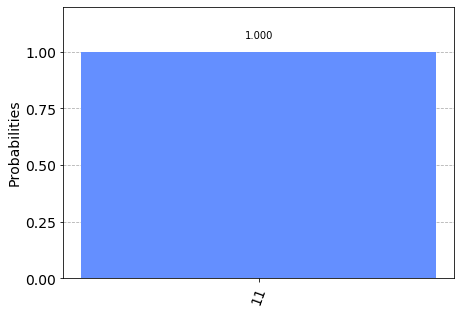

In [45]:
qiskit.tools.visualization.plot_histogram(counts)